In [1]:
import pandas as pd
import subprocess
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
#read parquet files
mistral_nodes = pd.read_parquet('mistral_30k/artifacts/create_final_nodes.parquet')
mistral_relationships = pd.read_parquet('mistral_30k/artifacts/create_final_relationships.parquet')

print(mistral_relationships) 
print(mistral_nodes)

                                source                             target  \
0                        SAMUEL NAMARA                          FIRUZABAD   
1                        SAMUEL NAMARA                      MEGGIE TAZBAH   
2                        SAMUEL NAMARA                    DURKE BATAGLANI   
3                        SAMUEL NAMARA                  ROBERT VON LIEBEN   
4                        SAMUEL NAMARA                    HOSTAGE RELEASE   
..                                 ...                                ...   
583                         EL ANATSUI  MEGGIE TAZBAH AND DURKE BATAGLANI   
584  MEGGIE TAZBAH AND DURKE BATAGLANI                   MIYAMOTO MUSASHI   
585                      HYMAN HURWITZ            SAMUEL TAYLOR COLERIDGE   
586                       MARIO SERENI                 METROPOLITAN OPERA   
587                         EUGEN BOLZ                   DANIEL BARENBOIM   

     weight                                        description  \
0     194

remove node with degree 0

In [41]:
mistral_nodes = mistral_nodes[mistral_nodes['id'].isin(mistral_relationships['source']) | mistral_nodes['id'].isin(mistral_relationships['target'])]


**Metrics Calculated:**
- Modularity Score:
Uses the Louvain community detection algorithm to partition nodes into communities and calculates the modularity score.
Modularity measures the strength of division of the network into modules (communities).
- Clustering Coefficient:
Calculates the average clustering coefficient of the graph, which indicates how nodes tend to cluster together.
- Density:
Measures the ratio of edges to the possible number of edges, giving an idea of how dense the graph is.
- Average Degree Centrality:
Computes the degree centrality for each node, then averages these values to get an overall measure of centrality.
- Assortativity:
Calculates the degree assortativity, which is a measure of the similarity of connections in the graph (e.g., if nodes with high degrees connect to other high-degree nodes).

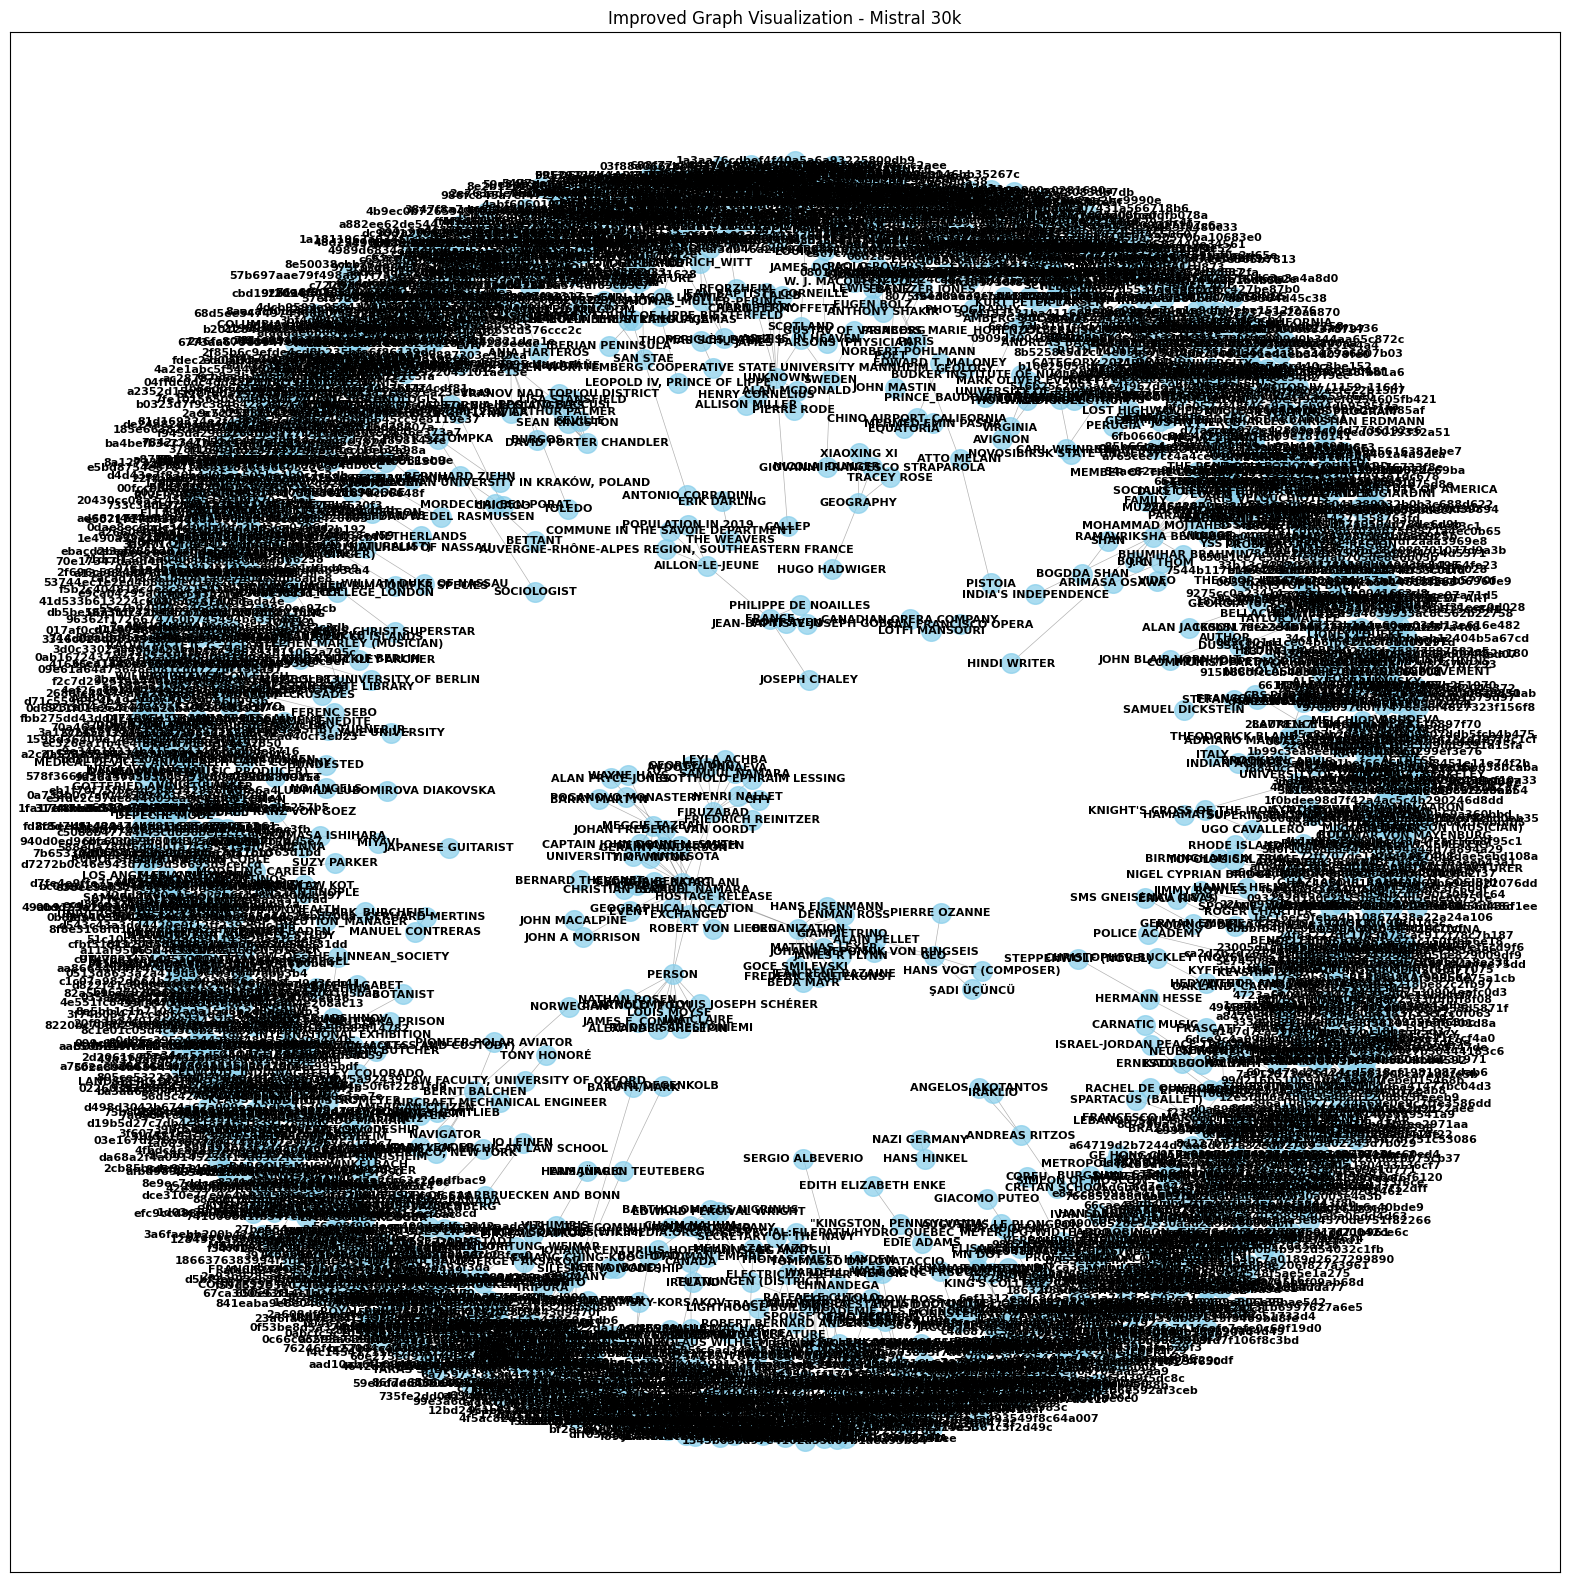

{'modularity_score': 0.9818073487898527, 'clustering_coefficient': 0.017591344939662145, 'average_degree_centrality': 0.0003709568541849359, 'density': 0.00037095685418493587, 'assortativity': 0.09631757893073205}
{'modularity_score': 0.9818073487898528, 'clustering_coefficient': 0.017591344939662145, 'average_degree_centrality': 0.0003709568541849359, 'density': 0.00037095685418493587, 'assortativity': 0.09631757893073205}


In [ ]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
from networkx.algorithms.community import greedy_modularity_communities
import community.community_louvain as community_louvain
from networkx.algorithms.community.quality import modularity

# Function to visualize the knowledge graph and return the graph
def visualize_knowledge_graph(nodes_df, relationships_df):
    G = nx.Graph()
    for _, node in nodes_df.iterrows():
        G.add_node(node['id'], label=node['title'], size=node['size'] * 10) 
    for _, rel in relationships_df.iterrows():
        G.add_edge(rel['source'], rel['target'], label=rel['description'])

    plt.figure(figsize=(20, 20))  
    pos = nx.spring_layout(G, k=0.1, iterations=50)  

    nx.draw_networkx_nodes(G, pos, node_size=200, node_color="skyblue", alpha=0.7)
    nx.draw_networkx_edges(G, pos, width=0.5, alpha=0.3)
    nx.draw_networkx_labels(G, pos, font_size=8, font_color="black", font_weight="bold")

    plt.title('Improved Graph Visualization - Mistral 30k')
    plt.show()
    
    return G  

G = visualize_knowledge_graph(mistral_nodes, mistral_relationships)

# Function to evaluate the graph
# def evaluate_graph(G):
#     modularity_score = calculate_modularity_score(G)
#     clustering_coefficient = calculate_clustering_coefficient(G)
#     avg_path_length, diameter = calculate_path_length_and_diameter(G)
#     avg_degree_centrality = calculate_degree_centrality(G)
#     density = calculate_density(G)
#     assortativity = calculate_assortativity(G)
    
#     return {
#         "modularity_score": modularity_score,
#         "clustering_coefficient": clustering_coefficient,
#         "average_degree_centrality": avg_degree_centrality,
#         "density": density,
#         "assortativity": assortativity
#     }
def evaluate_graph(G):
    partition = community_louvain.best_partition(G)
    modularity_score = community_louvain.modularity(partition, G)
    clustering_coefficient = nx.average_clustering(G)
    density = nx.density(G)
    avg_degree_centrality = sum(dict(nx.degree_centrality(G)).values()) / len(G)
    assortativity = nx.degree_assortativity_coefficient(G)

    return {
        "modularity_score": modularity_score,
        "clustering_coefficient": clustering_coefficient,
        "average_degree_centrality": avg_degree_centrality,
        "density": density,
        "assortativity": assortativity
    }

# Evaluate the graph
evaluation_results = evaluate_graph(G)
print(evaluation_results)

community clustering

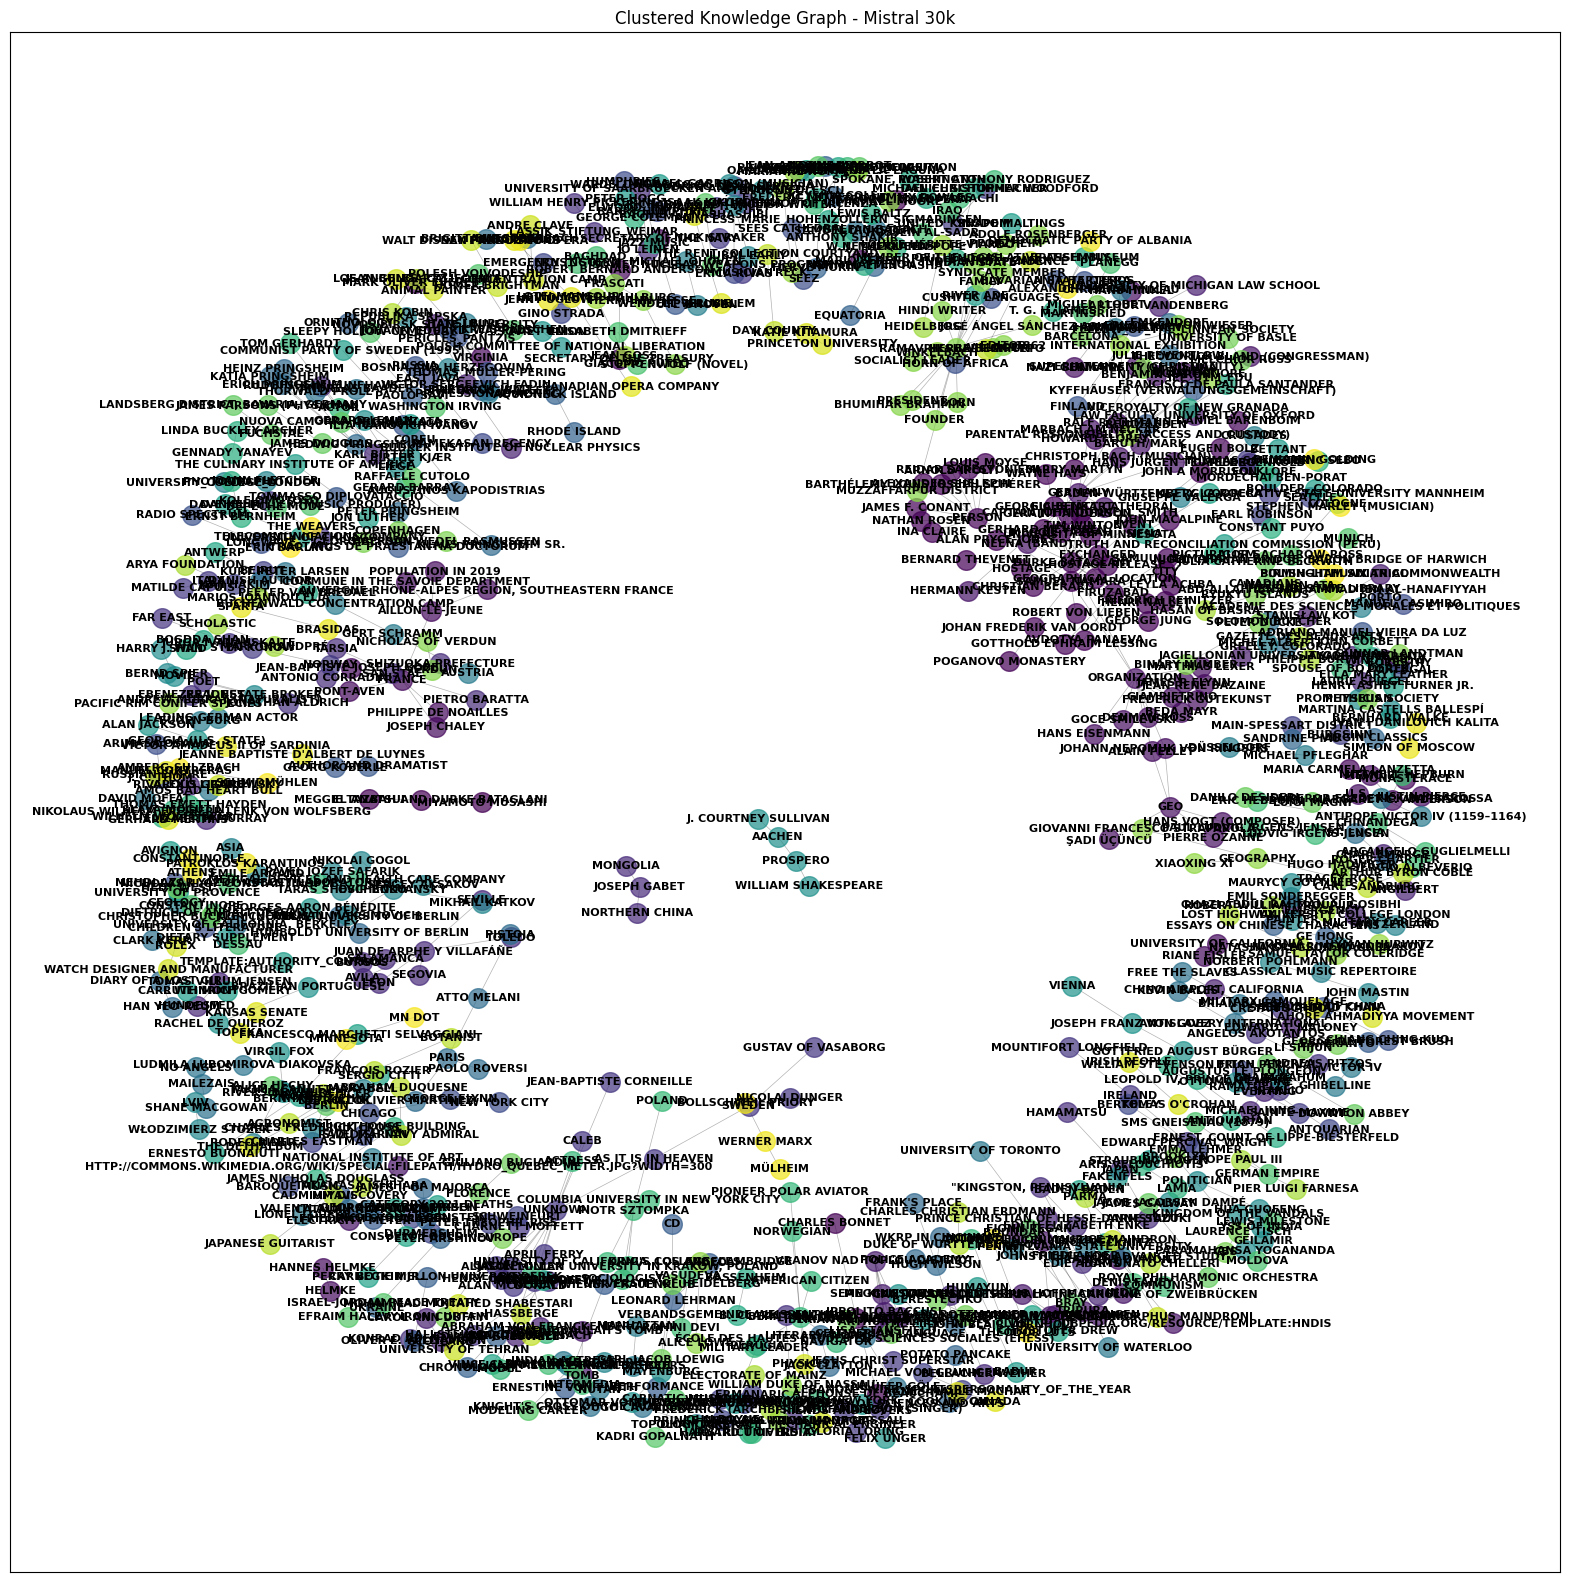

{'modularity_score': 0.9818073487898527, 'clustering_coefficient': 0.03520245543543627, 'average_degree_centrality': 0.0014863310625497657, 'density': 0.0014863310625497655, 'assortativity': 0.09631757893073227}


In [50]:
import networkx as nx
import community as community_louvain 
import community.community_louvain as community_louvain
communities =community_louvain.best_partition(G) # Ensure you have python-louvain installed
import matplotlib.pyplot as plt
import pandas as pd


# Function to cluster and visualize the knowledge graph
def cluster_and_visualize_knowledge_graph(nodes_df, relationships_df):
    # Ensure data types are correct for numeric operations
    nodes_df['id'] = nodes_df['id'].astype(str)  # Ensure 'id' is a string if it represents labels
    nodes_df['size'] = pd.to_numeric(nodes_df['size'], errors='coerce').fillna(1)  # Ensure 'size' is numeric
    relationships_df['source'] = relationships_df['source'].astype(str)
    relationships_df['target'] = relationships_df['target'].astype(str)

    # Initialize the graph
    G = nx.Graph()
    for _, node in nodes_df.iterrows():
        G.add_node(node['id'], label=node['title'], size=node['size'] * 10) 
    for _, rel in relationships_df.iterrows():
        G.add_edge(rel['source'], rel['target'], label=rel['description'])

    # Apply the Louvain method for community detection
    partition = community_louvain.best_partition(G)

    # Draw the graph
    plt.figure(figsize=(20, 20))
    pos = nx.spring_layout(G, k=0.1, iterations=50)

    # Draw nodes with colors by community
    cmap = plt.get_cmap('viridis')
    unique_communities = set(partition.values())
    for community in unique_communities:
        nodes_in_community = [node for node, comm in partition.items() if comm == community]
        nx.draw_networkx_nodes(G, pos, nodelist=nodes_in_community,
                               node_color=[cmap(community / len(unique_communities))], node_size=200, alpha=0.7)

    nx.draw_networkx_edges(G, pos, width=0.5, alpha=0.3)
    nx.draw_networkx_labels(G, pos, font_size=8, font_color="black", font_weight="bold")

    plt.title('Clustered Knowledge Graph - Mistral 30k')
    plt.show()

    return G  

G = cluster_and_visualize_knowledge_graph(mistral_nodes, mistral_relationships)

# Evaluate the graph
def evaluate_graph(G):
    partition = community_louvain.best_partition(G)
    modularity_score = community_louvain.modularity(partition, G)
    clustering_coefficient = nx.average_clustering(G)
    density = nx.density(G)
    avg_degree_centrality = sum(dict(nx.degree_centrality(G)).values()) / len(G)
    assortativity = nx.degree_assortativity_coefficient(G)

    return {
    "modularity_score": modularity_score,
    "clustering_coefficient": clustering_coefficient,
    "average_degree_centrality": avg_degree_centrality,
    "density": density,
    "assortativity": assortativity
    }

# Evaluate the clustered graph
evaluation_results = evaluate_graph(G)
print(evaluation_results)


### Orphaned Nodes Check

This function identifies **orphaned nodes** within the graph. 

- **Orphaned nodes** are entities that are not connected to any other nodes through relationships. 
- This could indicate missing relationships or data extraction issues.
  
The code:
1. Extracts the connected entities from the relationships dataframe.
2. Identifies nodes whose `title` is not part of the connected entities.
3. Prints the list of orphaned nodes for further analysis.

**Impact:** 
A large number of orphaned nodes suggests incomplete data or missing relationships, which might affect the overall graph quality.


In [44]:
def check_orphaned_nodes(nodes_df, relationships_df):
    connected_entities = set(relationships_df['source']).union(set(relationships_df['target']))
    orphaned_nodes = nodes_df[~nodes_df['title'].isin(connected_entities)]
    return orphaned_nodes

orphaned_nodes = check_orphaned_nodes(mistral_nodes, mistral_relationships)
print(f"Orphaned Nodes: {len(orphaned_nodes)}")

Orphaned Nodes: 0


Redundancy: Measures the ratio of duplicated relationships, helping to identify unnecessary repetition. An optimal redundancy ratio is 0, indicating no duplicate relationships. Higher values may signal inefficient or repeated connections, which could reduce graph performance and introduce noise.

In [45]:
def calculate_redundancy(relationships_df):
    redundant_relationships = relationships_df[relationships_df.duplicated(['source', 'target'])]
    redundancy_ratio = len(redundant_relationships) / len(relationships_df)
    return redundancy_ratio

redundancy = calculate_redundancy(mistral_relationships)
print(f"Redundancy: {redundancy}")


Redundancy: 0.0


In [ ]:
from sentence_transformers import SentenceTransformer, util

model = SentenceTransformer('all-MiniLM-L6-v2')

def calculate_relationship_similarity(relationships_df, nodes_df):
    node_embeddings = {node['id']: model.encode(node['description']) for _, node in nodes_df.iterrows()}
    relationship_scores = []

    for _, rel in relationships_df.iterrows():
        source = rel['source']
        target = rel['target']
        if source in node_embeddings and target in node_embeddings:
            sim_score = util.pytorch_cos_sim(node_embeddings[source], node_embeddings[target]).item()
        else:
            sim_score = 0
        relationship_scores.append(sim_score)

    relationships_df['similarity_score'] = relationship_scores
    return relationships_df

# Apply semantic consistency scoring
relationships_df_with_scores = calculate_relationship_similarity(mistral_relationships,mistral_nodes)
print(relationships_df_with_scores)


                                source                             target  \
0                        SAMUEL NAMARA                          FIRUZABAD   
1                        SAMUEL NAMARA                      MEGGIE TAZBAH   
2                        SAMUEL NAMARA                    DURKE BATAGLANI   
3                        SAMUEL NAMARA                  ROBERT VON LIEBEN   
4                        SAMUEL NAMARA                    HOSTAGE RELEASE   
..                                 ...                                ...   
583                         EL ANATSUI  MEGGIE TAZBAH AND DURKE BATAGLANI   
584  MEGGIE TAZBAH AND DURKE BATAGLANI                   MIYAMOTO MUSASHI   
585                      HYMAN HURWITZ            SAMUEL TAYLOR COLERIDGE   
586                       MARIO SERENI                 METROPOLITAN OPERA   
587                         EUGEN BOLZ                   DANIEL BARENBOIM   

                                           description  similarity_score  


This degree-based confidence score serves as a measure of how connected each entity is within the graph, which can be helpful in identifying key or influential entities. Higher confidence scores indicate nodes with greater connectivity, which might signify more important entities in the knowledge graph. This measure can help automatically verify the consistency of the graph by highlighting nodes with low scores, which may be less central or have fewer relationships, potentially identifying areas that need further validation or improvement.

In [47]:
def calculate_degree_confidence(G):
    degree_centrality = nx.degree_centrality(G)
    max_centrality = max(degree_centrality.values())
    confidence_scores = {node: centrality / max_centrality for node, centrality in degree_centrality.items()}
    return confidence_scores

# Calculate and assign degree-based confidence scores to nodes
entity_confidences = calculate_degree_confidence(G)
for node, score in entity_confidences.items():
    G.nodes[node]['confidence_score'] = score

# Display entity confidence scores
entity_confidences_df = pd.DataFrame(entity_confidences.items(), columns=['entity', 'confidence_score'])
print(entity_confidences_df)

                      entity  confidence_score
0              SAMUEL NAMARA          0.705882
1                  FIRUZABAD          0.647059
2              MEGGIE TAZBAH          0.647059
3            DURKE BATAGLANI          1.000000
4          ROBERT VON LIEBEN          0.058824
..                       ...               ...
885  SAMUEL TAYLOR COLERIDGE          0.058824
886             MARIO SERENI          0.058824
887       METROPOLITAN OPERA          0.058824
888               EUGEN BOLZ          0.058824
889         DANIEL BARENBOIM          0.058824

[890 rows x 2 columns]


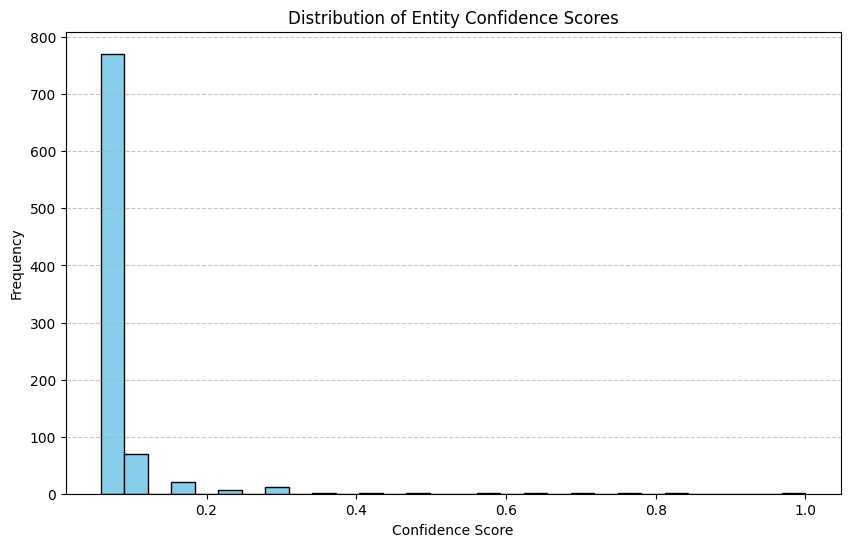

In [48]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.hist(entity_confidences_df['confidence_score'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Entity Confidence Scores')
plt.xlabel('Confidence Score')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

- High Proportion of Low Confidence Scores:

The majority of entities have very low confidence scores (close to 0), suggesting that most nodes in the knowledge graph have low connectivity or centrality. This can indicate that many entities are isolated or only weakly connected to the graph’s main structure.
If low connectivity isn’t intentional, this could point to insufficient relationships or poorly integrated data.
- Few High Confidence Scores:

Only a small number of entities have confidence scores above 0.5, and very few reach a score close to 1. This suggests that only a few nodes are acting as central hubs in the graph. Ideally, these should represent key entities if the graph is accurately modeled.
If these central nodes don’t align with expected important entities, it may indicate structural issues or misplaced relationships.
- Possible Sparsity and Fragmentation:

The sharp decline in confidence scores from the peak near 0 indicates that the graph might be sparse, with many nodes only weakly connected to the overall structure.
This can be improved by adding more meaningful relationships or re-evaluating the existing connections to ensure they represent real-world relationships.

                                source                             target  \
0                        SAMUEL NAMARA                          FIRUZABAD   
1                        SAMUEL NAMARA                      MEGGIE TAZBAH   
2                        SAMUEL NAMARA                    DURKE BATAGLANI   
3                        SAMUEL NAMARA                  ROBERT VON LIEBEN   
4                        SAMUEL NAMARA                    HOSTAGE RELEASE   
..                                 ...                                ...   
583                         EL ANATSUI  MEGGIE TAZBAH AND DURKE BATAGLANI   
584  MEGGIE TAZBAH AND DURKE BATAGLANI                   MIYAMOTO MUSASHI   
585                      HYMAN HURWITZ            SAMUEL TAYLOR COLERIDGE   
586                       MARIO SERENI                 METROPOLITAN OPERA   
587                         EUGEN BOLZ                   DANIEL BARENBOIM   

                                           description  confidence_score  


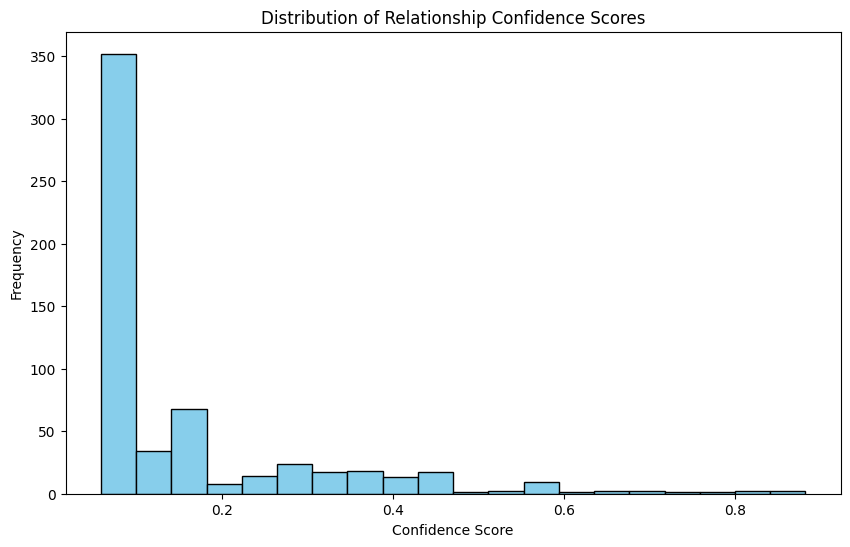

In [54]:
def calculate_relationship_degree_confidence(G, relationships_df):
    degree_centrality = nx.degree_centrality(G)
    max_centrality = max(degree_centrality.values())
    
    # Step 2: Calculate confidence scores for each relationship based on connected nodes
    relationship_confidences = []
    for _, rel in relationships_df.iterrows():
        source = rel['source']
        target = rel['target']
        
        # Get centrality for source and target nodes
        source_centrality = degree_centrality.get(source, 0)
        target_centrality = degree_centrality.get(target, 0)
        
        confidence_score = (source_centrality + target_centrality) / (2 * max_centrality)
        relationship_confidences.append(confidence_score)
    
    relationships_df['confidence_score'] = relationship_confidences
    return relationships_df

# Example usage with your relationships DataFrame
relationships_df_with_confidences = calculate_relationship_degree_confidence(G, mistral_relationships)
print(relationships_df_with_confidences[['source', 'target', 'description', 'confidence_score']])

def plot_relationship_confidence_distribution(relationships_df):
    plt.figure(figsize=(10, 6))
    plt.hist(relationships_df['confidence_score'], bins=20, color='skyblue', edgecolor='black')
    plt.title('Distribution of Relationship Confidence Scores')
    plt.xlabel('Confidence Score')
    plt.ylabel('Frequency')
    plt.show()

# Use the function to plot
plot_relationship_confidence_distribution(relationships_df_with_confidences)



extras

In [49]:
def check_path_consistency(G, start, end):
    try:
        # Check for any path between two nodes
        path = nx.shortest_path(G, source=start, target=end)
        return path
    except nx.NetworkXNoPath:
        return None

# Example usage
path = check_path_consistency(G, 'UNIVERSITY OF TORONTO', 'PROFESSIONAL ACTING')
print("Path between entities:", path)


Path between entities: None


In [ ]:
import networkx as nx
from sentence_transformers import SentenceTransformer, util
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity


model = SentenceTransformer('all-MiniLM-L6-v2')
def generate_subgraph_embedding(G, node_id, hops=2):
    """Generate an embedding based on the subgraph around a node up to N hops."""
    subgraph_nodes = nx.ego_graph(G, node_id, radius=hops).nodes()
    descriptions = [G.nodes[n]['description'] for n in subgraph_nodes if 'description' in G.nodes[n]]
    combined_description = " ".join(descriptions)
    return model.encode(combined_description, convert_to_tensor=True)

# Step 3: Calculate relationship confidence scores based on subgraph similarity
def calculate_relationship_confidence(G, relationships_df):
    confidence_scores = []

    for _, rel in relationships_df.iterrows():
        source, target = rel['source'], rel['target']
        
        # Check if both source and target have descriptions for embeddings
        if source in G and target in G:
            source_embedding = generate_subgraph_embedding(G, source)
            target_embedding = generate_subgraph_embedding(G, target)
            
            # Calculate similarity score between source and target subgraph embeddings
            similarity = util.pytorch_cos_sim(source_embedding, target_embedding).item()
        else:
            similarity = 0  # Default score if embeddings are missing
        
        confidence_scores.append(similarity)
    
    relationships_df['confidence_score'] = confidence_scores
    return relationships_df

# Step 4: Apply to knowledge graph data and calculate scores
# Replace `nodes_df` and `relationships_df` with your actual data

relationships_with_confidence = calculate_relationship_confidence(G, mistral_relationships)

relationships_with_confidence
#file:///C:/Users/lameu/Downloads/Li_2024_J._Phys.__Conf._Ser._2833_012001.pdf

c:\Users\lameu\anaconda3\envs\graphrag\Lib\site-packages\sentence_transformers\cross_encoder\CrossEncoder.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


                                source                             target  \
0                        SAMUEL NAMARA                          FIRUZABAD   
1                        SAMUEL NAMARA                      MEGGIE TAZBAH   
2                        SAMUEL NAMARA                    DURKE BATAGLANI   
3                        SAMUEL NAMARA                  ROBERT VON LIEBEN   
4                        SAMUEL NAMARA                    HOSTAGE RELEASE   
..                                 ...                                ...   
583                         EL ANATSUI  MEGGIE TAZBAH AND DURKE BATAGLANI   
584  MEGGIE TAZBAH AND DURKE BATAGLANI                   MIYAMOTO MUSASHI   
585                      HYMAN HURWITZ            SAMUEL TAYLOR COLERIDGE   
586                       MARIO SERENI                 METROPOLITAN OPERA   
587                         EUGEN BOLZ                   DANIEL BARENBOIM   

                                           description  confidence_score  
